In [64]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
from scipy.sparse import csr_array, csr_matrix
from numpy.random import rand
from scipy.sparse import random
import time

In [101]:
from lanczos_dense import lanczos_eig

In [213]:
def timer(func, runs, *args):
    tavglist = []
    for _ in range(runs):
        t1 = time.time()
        _ = func(*args)
        t2 = time.time()
        tavglist.append(t2 - t1)
    return np.mean(tavglist)

In [83]:
timelist_grand = []
avging = 50
for size in range(10,1060,50):
    timelist = []
    for _ in range(avging):
        v0 = rand(size,1)
        Asp = random(size,size,density=0.01,format='csr')
        
        A = Asp.todense()
        teval_sp = timer(lambda: Asp @ v0, 1000) 
        teval_de = timer(lambda: A @ v0, 1000)
        timelist.append([teval_sp, teval_de])
    timelist_grand.append(np.mean(timelist,axis=0))

Text(200, 0.6, 'for size > 200, sparse is better (i.e 8 qubit or more)')

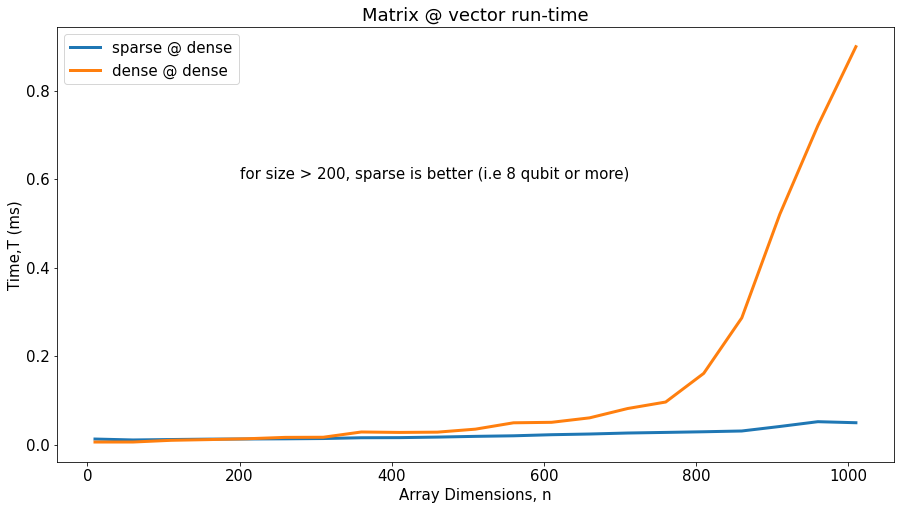

In [100]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 15,'lines.linewidth':3})
plt.plot(range(10,1060,50),np.array(timelist_grand)[:,0]*1000,label='sparse @ dense')
plt.plot(range(10,1060,50),np.array(timelist_grand)[:,1]*1000,label='dense @ dense')
plt.legend()
plt.xlabel('Array Dimensions, n')
plt.ylabel('Time,T (ms)')
plt.title('Matrix @ vector run-time')
plt.text(200,0.6,'for size > 200, sparse is better (i.e 8 qubit or more)')